<a href="https://colab.research.google.com/github/KONDAIAHGARISHANTHAN/TSF--GRIP--TASKS/blob/main/Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2 : Data Analysis On Global Terrorism**
# Performed by : K.Shanthan
# Organization : The Spark Foundation
# Batch : September - 2023

# Problem Statement

In [ ]:
###  As a security/defence analyst, find out hot zone of Terrorism ###

###  what the security issues and insights you can derive by EDA  ###

# Importing Libraries

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
df= pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding="latin-1")


<ipython-input-101-1944154353cf>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r"/content/globalterrorismdb_0718dist.csv",encoding="latin-1")


In [108]:
import pandas as pd

# Define the file path
file_path = "/content/globalterrorismdb_0718dist.csv"

# Specify the encoding, delimiter, and skip rows with parsing errors
try:
    df = pd.read_csv(file_path, encoding="latin-1", delimiter=",", error_bad_lines=False)
except pd.errors.ParserError:
    # If there are still parsing errors, try different encoding or preprocessing steps
    df = pd.read_csv(file_path, encoding="utf-8", delimiter=",", error_bad_lines=False)

# Now, you should have a DataFrame with 181,691 rows


<ipython-input-108-7cbb766e4921>:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, encoding="latin-1", delimiter=",", error_bad_lines=False)
<ipython-input-108-7cbb766e4921>:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="latin-1", delimiter=",", error_bad_lines=False)


In [ ]:
import pandas as pd

# Define the file path
file_path = "/content/globalterrorismdb_0718dist.csv"

# Define chunk size
chunk_size = 10000

# Initialize an empty list to store chunks
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, encoding="latin-1", delimiter=",", chunksize=chunk_size, error_bad_lines=False):
    chunks.append(chunk)

# Concatenate the chunks to get the complete DataFrame
df = pd.concat(chunks, ignore_index=True)


In [67]:
pd.set_option('display.max_rows', None)

# Data Preprocessing

In [114]:
df.shape


(181691, 135)

In [74]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [119]:
df1= df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","summary","attacktype1_txt","targtype1_txt","targsubtype1_txt","gname","motive","weaptype1_txt","weapsubtype1_txt","nkill","nwound","propvalue","propcomment"]]
df1


In [120]:
df1.shape

(181691, 21)

In [121]:
df2=df1.rename(columns={"iyear":"year","imonth":"month","iday":"day","country_txt":"country","region_txt":"region","provstate":"state","attacktype1_txt":"attacktype","targtype1_txt":"targettype","targsubtype1_txt":"targetsubtype","gname":"gangname","weaptype1_txt":"weapontype","weapsubtype1_txt":"weapsubtype","nkill":"kill","nwound":"wound","propvalue":"propertyvalue"})
df2

In [122]:
df2.describe()

,year,month,day,latitude,longitude,kill,wound,propertyvalue
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,3.898900e+04
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,2.088119e+05
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,1.552463e+07
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,-9.900000e+01
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,-9.900000e+01
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,-9.900000e+01
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000e+03
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,2.700000e+09


In [ ]:
df2.country.unique()

In [124]:
df2.attacktype.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [125]:
df2.gangname.unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [ ]:
df2.isnull().sum()

year                  0
month                 0
day                   0
country               0
region                0
state               421
city                434
latitude           4556
longitude          4557
summary           66129
attacktype            0
targettype            0
targetsubtype     10373
gangname              0
motive           131130
weapontype            0
weapsubtype       20768
kill              10313
wound             16311
propertyvalue    142702
propcomment      123732
dtype: int64

In [139]:
df2.dropna(subset=['state','city','latitude','longitude','summary','attacktype','targettype','targetsubtype','gangname','motive','weapontype','weapsubtype','kill','wound','propertyvalue','propcomment'],inplace=True)

In [140]:
df2.isnull().sum()

year             0
month            0
day              0
country          0
region           0
state            0
city             0
latitude         0
longitude        0
summary          0
attacktype       0
targettype       0
targetsubtype    0
gangname         0
motive           0
weapontype       0
weapsubtype      0
kill             0
wound            0
propertyvalue    0
propcomment      0
dtype: int64

In [127]:
df2.shape

(181691, 21)

#Finding Insights

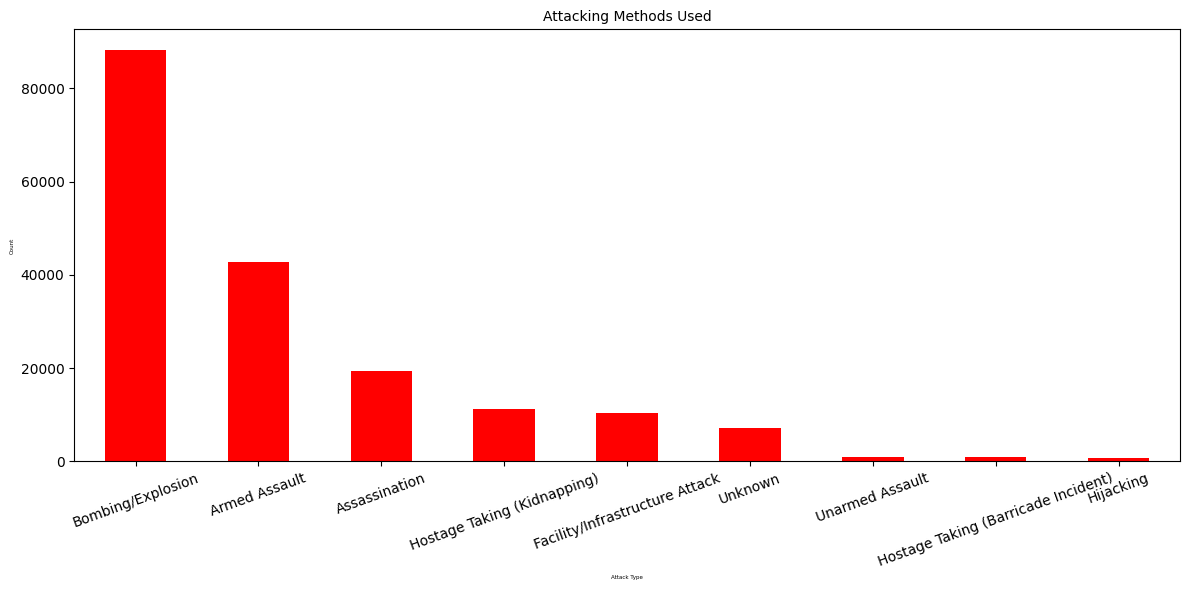

In [128]:
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = df2['attacktype'].value_counts().plot(kind='bar', color='red')

# Add a title
plt.title('Attacking Methods Used', fontsize=10)

# Add labels to the x and y axes
ax.set_xlabel('Attack Type', fontsize=4)
ax.set_ylabel('Count', fontsize=4)

# Optionally, you can rotate the x-axis labels for better readability (if needed)
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
## From the above figure Bombing/Explosion Frequently used attacking method

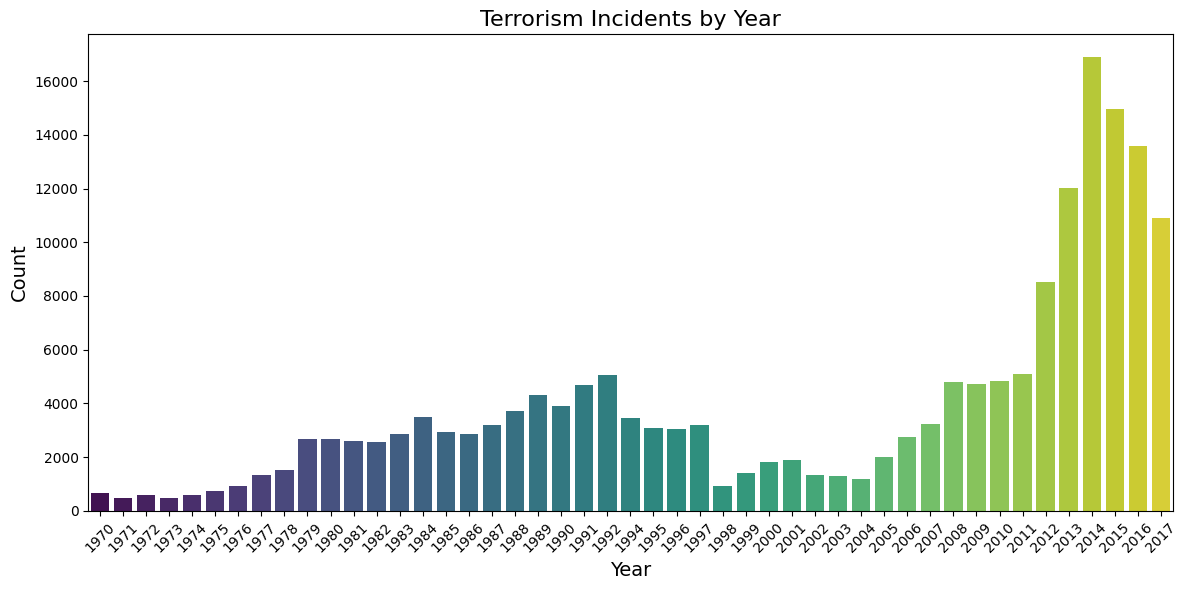

In [129]:
plt.figure(figsize=(12, 6))

# Create a count plot with Seaborn
ax = sns.countplot(x='year', data=df2, palette='viridis')  # You can choose a different palette

# Add labels and a title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Terrorism Incidents by Year', fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Optionally, you can add additional styling or annotations as needed

# Show the plot
plt.tight_layout()  # Ensures the labels are not cut off
plt.show()

In [ ]:
# from the above graph terrorism is raised in betwen 2012 to 2017

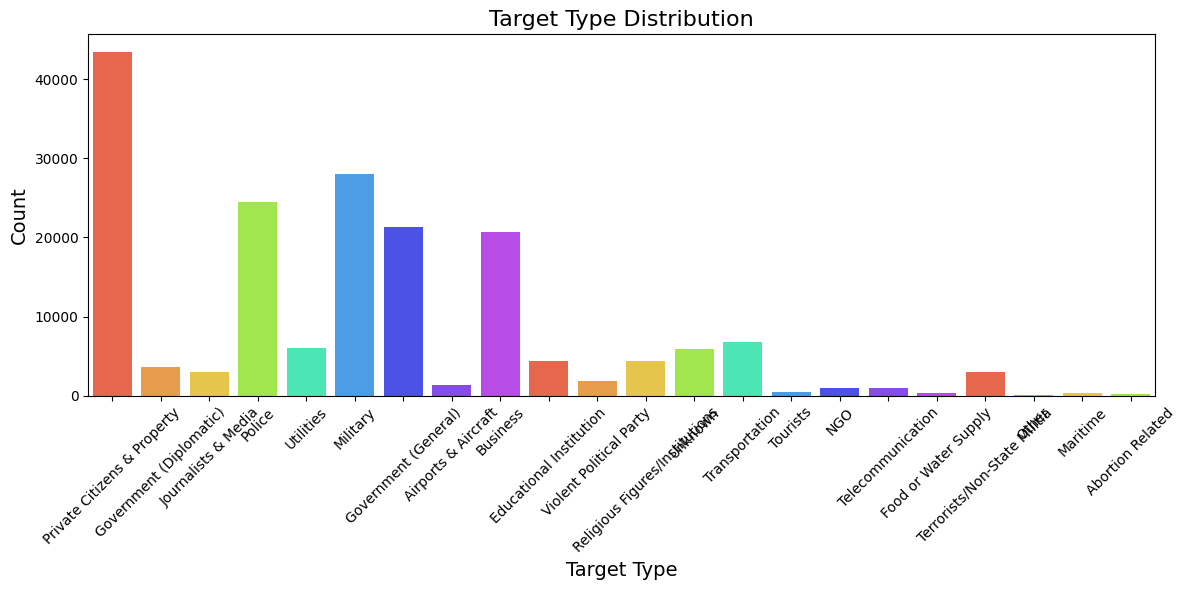

In [130]:
plt.figure(figsize=(12, 6))

# Create a count plot with Seaborn and choose a custom color palette
custom_palette = ['#FF5733', '#FF9F33', '#FFD433', '#A2FF33', '#33FFBE', '#339DFF', '#333BFF', '#8033FF', '#C133FF']
ax = sns.countplot(x='targettype', data=df2, palette=custom_palette)

# Add labels and a title
ax.set_xlabel('Target Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Target Type Distribution', fontsize=16)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Optionally, you can add additional styling or annotations as needed

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# from the above bar graph private citizens are mostly taregeted

In [131]:
df2[["year", "kill"]].groupby(["year"]).agg("sum")


,kill
year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


In [ ]:
# finding the year and no of Kills

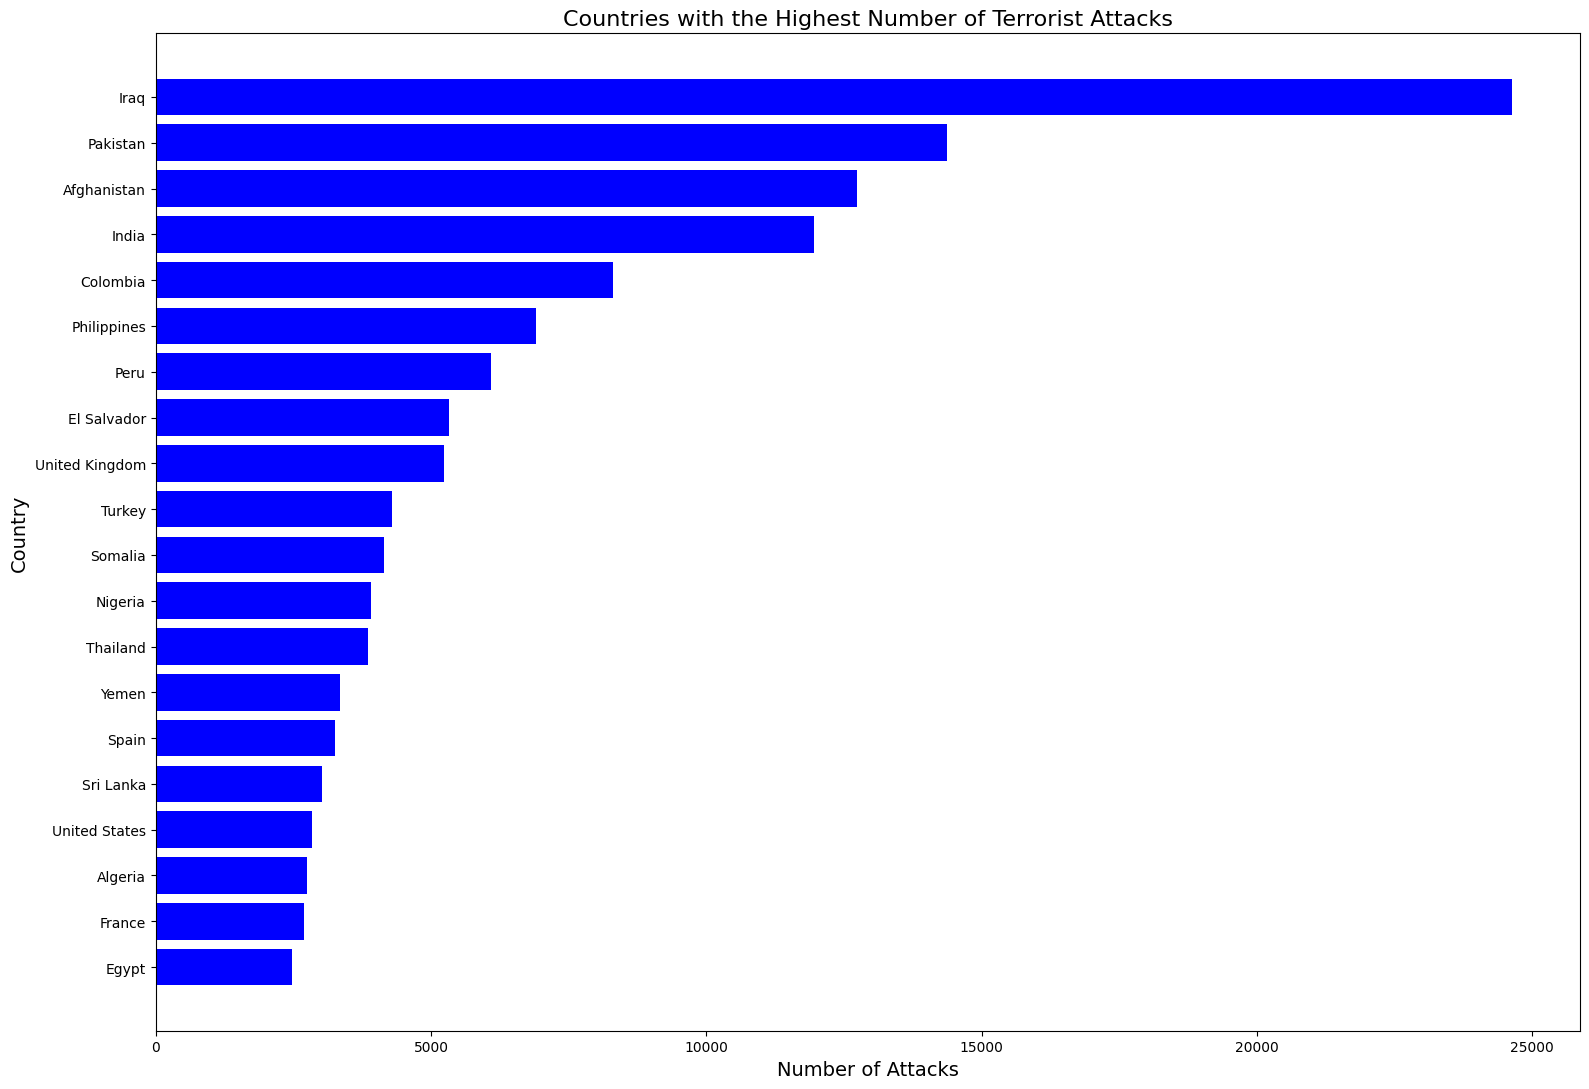

In [133]:
plt.figure(figsize=(16, 11))

# Get the top 20 countries with the highest terrorist attacks
top_countries = df2['country'].value_counts()[:20]

# Create a bar plot using matplotlib
plt.barh(top_countries.index, top_countries.values, color='blue')

# Add labels and a title
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Countries with the Highest Number of Terrorist Attacks', fontsize=16)

# Invert the y-axis to show the highest count at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Iraq has the Highest no of attacks

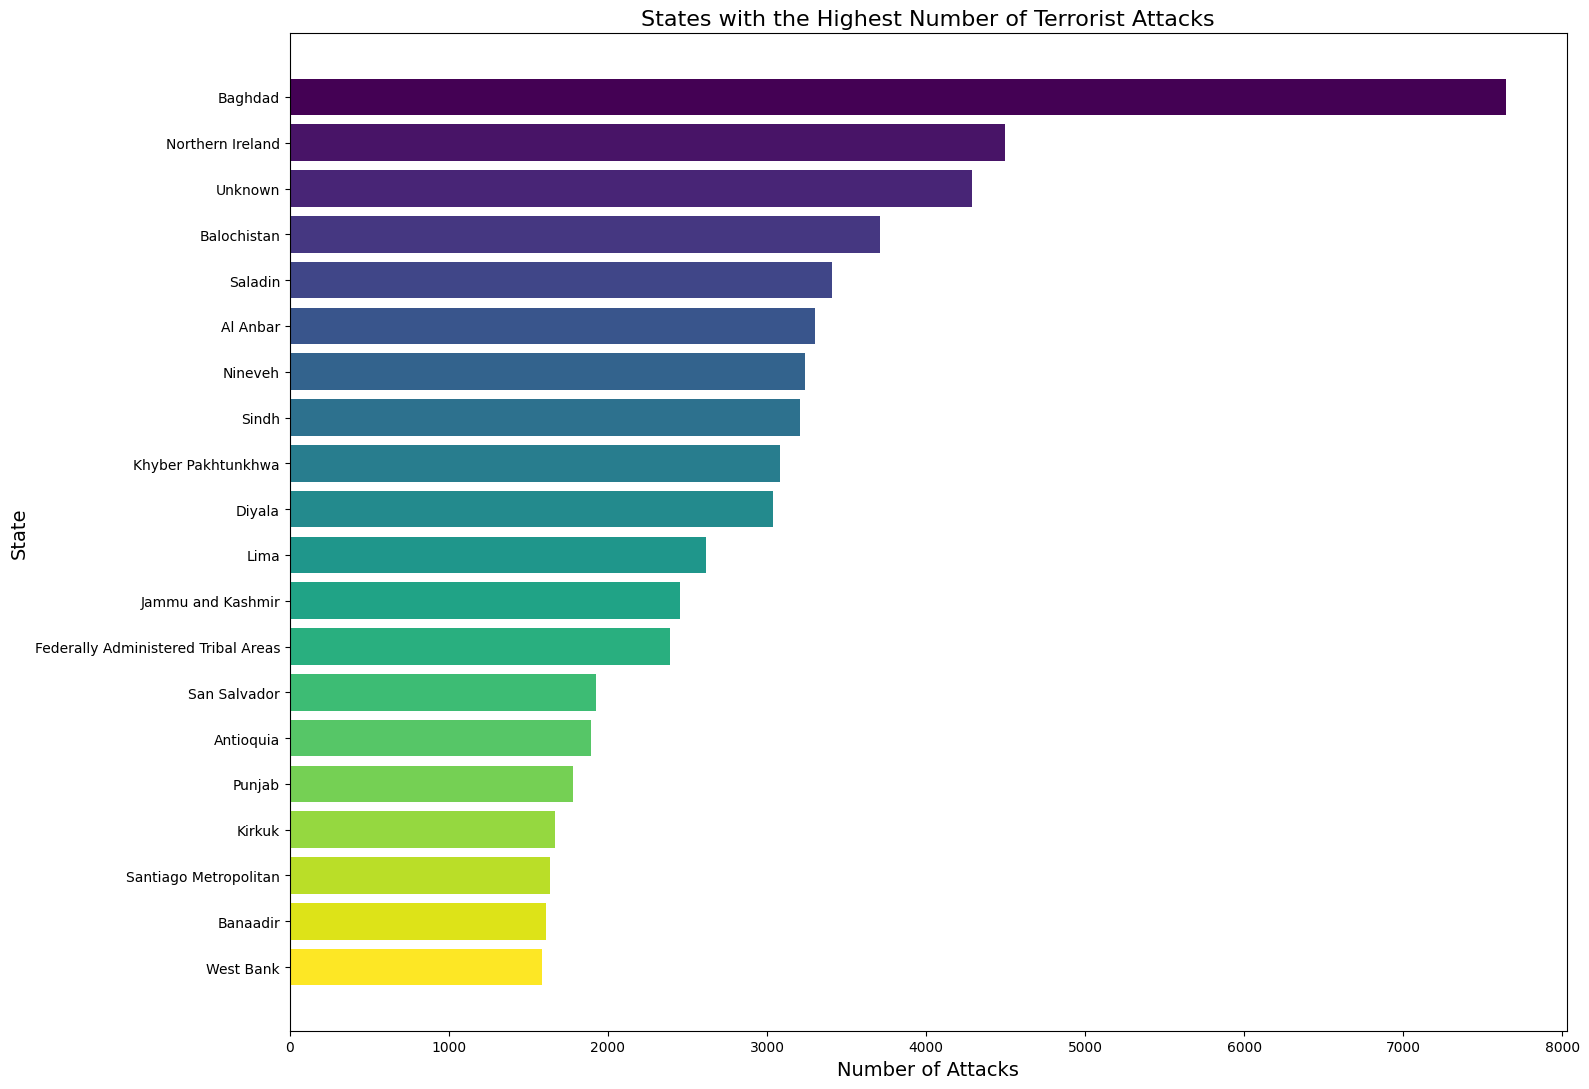

In [134]:
top_states = df2['state'].value_counts()[:20]
plt.figure(figsize=(16,11))

# Generate a list of different colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_states)))

# Create a bar plot using matplotlib with different colors
plt.barh(top_states.index, top_states.values, color=colors)

# Add labels and a title
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('State', fontsize=14)  # Changed 'Country' to 'State' in ylabel
plt.title('States with the Highest Number of Terrorist Attacks', fontsize=16)

# Invert the y-axis to show the highest count at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# from the above figure Baghdad has highest no of attacks

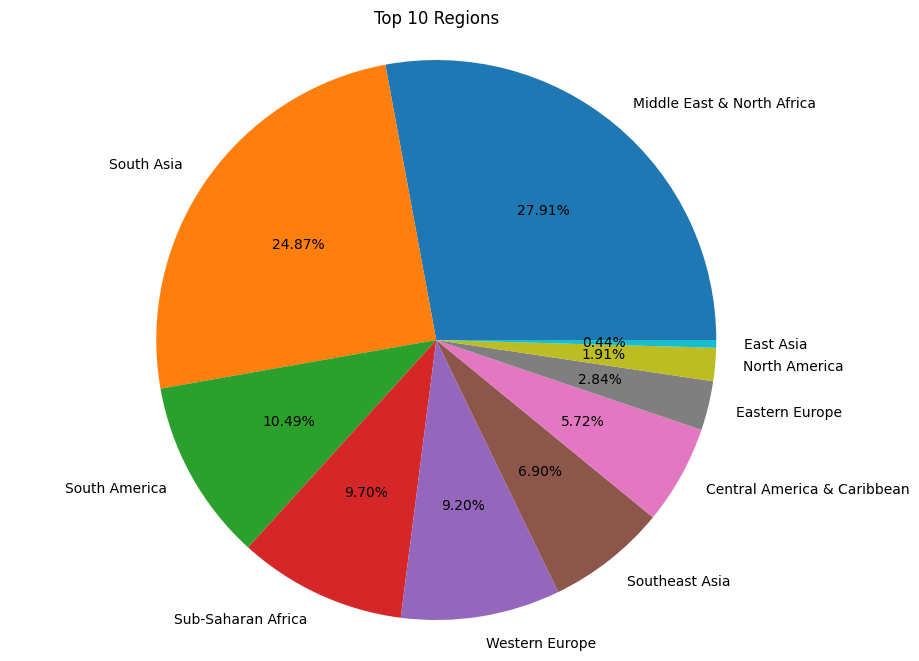

In [135]:
plt.figure(figsize=(11,8))
xyz = df2["region"].value_counts().iloc[:10]

# Create a pie chart
plt.pie(xyz, labels=xyz.index, autopct="%0.2f%%", radius=1.0)

# Set the title
plt.title("Top 10 Regions")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
# from the figure you can find the Top 10 Regions

<Axes: title={'center': 'weapons used'}>

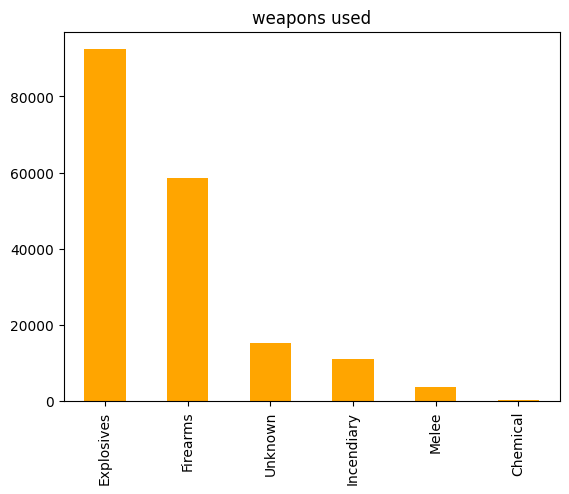

In [136]:
plt.title("weapons used")
df2['weapontype'].value_counts()[:6].plot(kind='bar',color='orange')

In [ ]:
# From the above figure mostly explosives are used for attacking

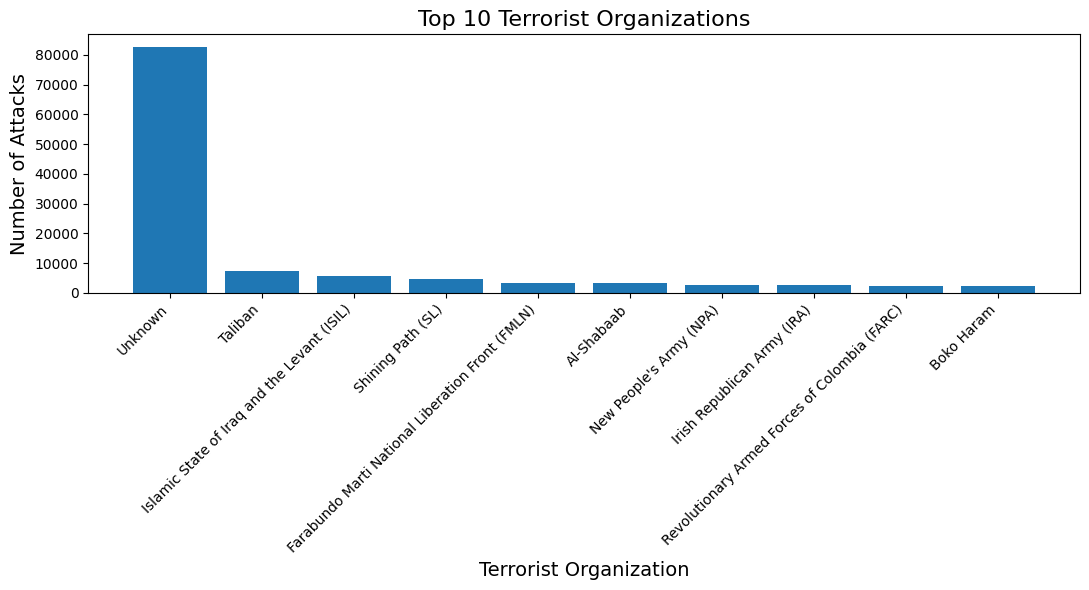

In [137]:
plt.figure(figsize=(11,6))
top_terrorist_organizations = df2["gangname"].value_counts().head(10)

# Create a bar chart
plt.bar(top_terrorist_organizations.index, top_terrorist_organizations.values)

# Add labels and a title
plt.xlabel('Terrorist Organization', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Top 10 Terrorist Organizations', fontsize=16)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.tight_layout()
plt.show()

# **Conclusion**

In [ ]:
# The Middle East and North Africa regions are most targetted ones

In [ ]:
# Mostly weapons used are Explosives

In [ ]:
# Baghdad state has highest number of attacks

In [ ]:
# Country Iraq has highest number of attacks

In [ ]:
# most terrorist activites done in North Africa

In [ ]:
                                                            ###Thank You###